In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
mnist = keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
model = keras.models.Sequential([
  keras.layers.Conv2D(20, kernel_size=(5,5), padding='valid',input_shape=(28,28,1),activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),  
  keras.layers.Dense(500, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'),
  keras.layers.Dropout(0.5),  
  keras.layers.Dense(10, activation='softmax',kernel_initializer='glorot_uniform',bias_initializer='zeros')
])

In [17]:
optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

In [18]:
loss=keras.losses.SparseCategoricalCrossentropy()

In [19]:
callbacks=tf.keras.callbacks.Callback()

In [20]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=5,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.4989 - accuracy: 0.8520
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2230 - accuracy: 0.9340
Epoch 3/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.1717 - accuracy: 0.9487
Epoch 4/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1433 - accuracy: 0.9576
Epoch 5/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1241 - accuracy: 0.9623


In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 432us/sample - loss: 0.0855 - accuracy: 0.9747


[0.0854509364053607, 0.9747]

In [61]:
from PIL import Image
%matplotlib inline

In [69]:
imge = Image.open("two.png")
imge.thumbnail((28,28))
img = (np.expand_dims(imge,1))
img=img.reshape(1,28,28,1)

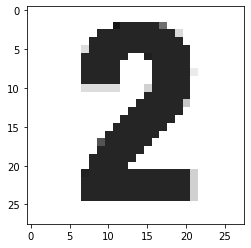

In [70]:
plt.imshow(imge)

In [71]:
np.argmax(model.predict(img))

8

In [72]:
model.predict(img)

array([[7.8777485e-10, 1.1510451e-09, 6.3985825e-02, 6.4025164e-07,
        2.8735580e-17, 1.2842393e-07, 1.6974008e-09, 4.0706001e-14,
        9.3601340e-01, 2.2229575e-14]], dtype=float32)